In [1]:
#!pip install tensorflow

In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
from io import BytesIO
from PIL import Image
from keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import Model
from tensorflow.keras.utils import img_to_array, load_img

In [3]:
data = pd.read_csv('fyt.csv')

data.head(10)

,user_id,username,category,image_id,image_url
0,1,fadiyahuwu,gunung,1,https://storage.googleapis.com/planc-product-c...
1,1,fadiyahuwu,taman bermain,2,https://storage.googleapis.com/planc-product-c...
2,2,curiousgeorge,gunung,3,https://storage.googleapis.com/planc-product-c...
3,2,curiousgeorge,taman bermain,4,https://storage.googleapis.com/planc-product-c...
4,3,lebahganteng,gunung,5,https://storage.googleapis.com/planc-product-c...
5,3,lebahganteng,taman bermain,6,https://storage.googleapis.com/planc-product-c...
6,3,lebahganteng,museum,7,https://storage.googleapis.com/planc-product-c...
7,3,lebahganteng,sungai,8,https://storage.googleapis.com/planc-product-c...
8,3,lebahganteng,pantai,9,https://storage.googleapis.com/planc-product-c...
9,4,salsaselasa,gunung,10,https://storage.googleapis.com/planc-product-c...


In [4]:
print("Total number of user_id : ", data.shape[0])
print("Total number of user_id : ", data["user_id"].nunique())
print("Total number of username : ", data["username"].nunique())
print("Total number of unique category : ", data["category"].nunique())
print("Total number of unique image_id : ", data["image_id"].nunique())
print("Total number of unique image_url : ", data["image_url"].nunique())

Total number of user_id :  64
Total number of user_id :  30
Total number of username :  30
Total number of unique category :  7
Total number of unique image_id :  64
Total number of unique image_url :  63


In [5]:
data['category'].value_counts()

gunung           27
pantai            8
taman bermain     6
museum            6
sungai            6
air terjun        6
candi             5
Name: category, dtype: int64

C:\Users\Salsabila\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'gunung'),
 Text(1, 0, 'taman bermain'),
 Text(2, 0, 'museum'),
 Text(3, 0, 'sungai'),
 Text(4, 0, 'pantai'),
 Text(5, 0, 'candi'),
 Text(6, 0, 'air terjun')]

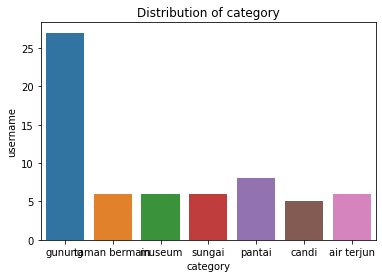

In [6]:
plot = sns.countplot(data["category"])
plt.title("Distribution of category")
plt.xlabel("category")
plt.ylabel("username")
plot.set_xticklabels(plot.get_xticklabels())

In [7]:
print(data.columns)

Index(['user_id', 'username', 'category', 'image_id', 'image_url'], dtype='object')


In [8]:
print(data.dtypes)

user_id       int64
username     object
category     object
image_id      int64
image_url    object
dtype: object


In [9]:
#load model classification
model = tf.keras.models.load_model('classification.h5')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [14]:
def load_and_preprocess_image(image_url):
    response = requests.get(image_url)
    image_data = response.content
    
    image = Image.open(BytesIO(image_data))
    image = image.resize((150, 150))
    image = np.array(image)
    image = image / 255.0  
    return image

image_features = pd.DataFrame(columns=['user_id', 'image_feature', 'content_url'])
for index, row in data.iterrows():
    user_id = row['user_id']
    image_url = row['image_url']
    print(image_url)
    
    image = load_and_preprocess_image(image_url)
    features = model.predict(np.expand_dims(image, axis=0))
    image_features = image_features.append({'user_id': user_id, 'image_feature': features.flatten(), 'content_url' : str(image_url)}, ignore_index=True)

merged_data = pd.merge(data, image_features, on='user_id')
print("Data berhasil diekstraksi:")
#print(merged_data)

https://storage.googleapis.com/planc-product-capstone-bucket/user_img/user_img/gunung/1_gunung.jpg
1/1 [==============================] - 0s 271ms/step
https://storage.googleapis.com/planc-product-capstone-bucket/user_img/user_img/taman%20bermain/1_taman%20bermain.jpg
1/1 [==============================] - 0s 99ms/step
https://storage.googleapis.com/planc-product-capstone-bucket/user_img/user_img/gunung/2_gunung.jpg
1/1 [==============================] - 0s 40ms/step
https://storage.googleapis.com/planc-product-capstone-bucket/user_img/user_img/taman%20bermain/2_taman%20bermain.jpg
1/1 [==============================] - 0s 66ms/step
https://storage.googleapis.com/planc-product-capstone-bucket/user_img/user_img/gunung/3_gunung.jpg
1/1 [==============================] - 0s 75ms/step
https://storage.googleapis.com/planc-product-capstone-bucket/user_img/user_img/taman%20bermain/3_taman%20bermain.jpg
1/1 [==============================] - 0s 51ms/step
https://storage.googleapis.com/planc-pr

In [15]:
merged_data.head()

,user_id,username,category,image_id,image_url,image_feature,content_url
0,1,fadiyahuwu,gunung,1,https://storage.googleapis.com/planc-product-c...,"[8.4541504e-08, 1.0063518e-07, 0.999793, 8.777...",https://storage.googleapis.com/planc-product-c...
1,1,fadiyahuwu,gunung,1,https://storage.googleapis.com/planc-product-c...,"[0.16042207, 0.0017140971, 0.82458746, 0.00012...",https://storage.googleapis.com/planc-product-c...
2,1,fadiyahuwu,taman bermain,2,https://storage.googleapis.com/planc-product-c...,"[8.4541504e-08, 1.0063518e-07, 0.999793, 8.777...",https://storage.googleapis.com/planc-product-c...
3,1,fadiyahuwu,taman bermain,2,https://storage.googleapis.com/planc-product-c...,"[0.16042207, 0.0017140971, 0.82458746, 0.00012...",https://storage.googleapis.com/planc-product-c...
4,2,curiousgeorge,gunung,3,https://storage.googleapis.com/planc-product-c...,"[4.5139099e-13, 1.2367175e-14, 0.9980532, 1.13...",https://storage.googleapis.com/planc-product-c...


In [16]:
image_features.head(10)

,user_id,image_feature,content_url
0,1,"[8.4541504e-08, 1.0063518e-07, 0.999793, 8.777...",https://storage.googleapis.com/planc-product-c...
1,1,"[0.16042207, 0.0017140971, 0.82458746, 0.00012...",https://storage.googleapis.com/planc-product-c...
2,2,"[4.5139099e-13, 1.2367175e-14, 0.9980532, 1.13...",https://storage.googleapis.com/planc-product-c...
3,2,"[2.11998e-05, 0.00018672136, 0.22882694, 0.002...",https://storage.googleapis.com/planc-product-c...
4,3,"[0.002339982, 3.015616e-09, 0.9700075, 3.27640...",https://storage.googleapis.com/planc-product-c...
5,3,"[0.0048438706, 0.007954306, 0.02330655, 0.0165...",https://storage.googleapis.com/planc-product-c...
6,3,"[0.0020036532, 0.0006512417, 0.04143725, 1.368...",https://storage.googleapis.com/planc-product-c...
7,3,"[0.15907034, 0.00014661843, 0.024731256, 7.086...",https://storage.googleapis.com/planc-product-c...
8,3,"[0.015982304, 0.01423987, 0.20614183, 0.000204...",https://storage.googleapis.com/planc-product-c...
9,4,"[8.576117e-05, 7.21135e-06, 0.9802214, 3.99726...",https://storage.googleapis.com/planc-product-c...


In [19]:
def load_and_preprocess_image(image_url):
    response = requests.get(image_url)
    image = Image.open(BytesIO(response.content))
    image = image.resize((150, 150)) 
    image = np.array(image)
    image = image / .255
    return image

def recommend_similar_images(data, new_image_url, top_n=10):
    new_image = load_and_preprocess_image(new_image_url)
    new_image = np.expand_dims(new_image, axis=0)
    new_image_feature = model.predict(new_image).flatten()

    image_feature_vectors = np.vstack(data['image_feature'].values)
    cosine_sim_matrix = cosine_similarity(image_feature_vectors, np.expand_dims(new_image_feature, axis=0))
    similarity_scores = cosine_sim_matrix.flatten()
    sorted_indices = np.argsort(similarity_scores)[::-1][:top_n]

    recommended_images = data.iloc[sorted_indices]
    return recommended_images



In [20]:
new_image_url = 'https://storage.googleapis.com/planc-product-capstone-bucket/user_img/user_img/gunung/8_gunung(1).jpg'
recommended_images = recommend_similar_images(image_features, new_image_url, top_n=10)
for i in range(10):
    print(recommended_images['content_url'].iloc[i])


1/1 [==============================] - 0s 49ms/step
https://storage.googleapis.com/planc-product-capstone-bucket/user_img/user_img/gunung/1_gunung.jpg
https://storage.googleapis.com/planc-product-capstone-bucket/user_img/user_img/gunung/8_gunung(1).jpg
https://storage.googleapis.com/planc-product-capstone-bucket/user_img/user_img/gunung/24_gunung.jpg
https://storage.googleapis.com/planc-product-capstone-bucket/user_img/user_img/gunung/21_gunung.jpg
https://storage.googleapis.com/planc-product-capstone-bucket/user_img/user_img/gunung/2_gunung.jpg
https://storage.googleapis.com/planc-product-capstone-bucket/user_img/user_img/sungai/4_sungai.jpg
https://storage.googleapis.com/planc-product-capstone-bucket/user_img/user_img/gunung/26_gunung.jpg
https://storage.googleapis.com/planc-product-capstone-bucket/user_img/user_img/gunung/15_gunung.jpg
https://storage.googleapis.com/planc-product-capstone-bucket/user_img/user_img/gunung/4_gunung.jpg
https://storage.googleapis.com/planc-product-capst

In [21]:
print(recommended_images['content_url'].iloc[0])

https://storage.googleapis.com/planc-product-capstone-bucket/user_img/user_img/gunung/1_gunung.jpg


In [23]:
#pd.options.display.max_rows = 4000

In [24]:
import pickle

with open('recommended_images.pkl', 'wb') as file:
    pickle.dump(recommended_images, file)

In [25]:
with open('recommended_images.pkl', 'rb') as file:
    loaded_images = pickle.load(file)

print(loaded_images)

   user_id                                      image_feature  \
0        1  [8.4541504e-08, 1.0063518e-07, 0.999793, 8.777...   
21       9  [1.274176e-07, 1.1266337e-08, 0.9999641, 5.162...   
53      24  [1.7160852e-06, 0.0008915777, 0.9982926, 3.889...   
47      21  [4.8010946e-07, 8.197717e-08, 0.9984419, 9.458...   
2        2  [4.5139099e-13, 1.2367175e-14, 0.9980532, 1.13...   
13       4  [0.0004325505, 9.722459e-08, 0.9929563, 1.2140...   
57      26  [5.9154092e-05, 0.0061352346, 0.98627925, 1.66...   
34      15  [9.854604e-07, 2.3914904e-08, 0.98814917, 3.50...   
9        4  [8.576117e-05, 7.21135e-06, 0.9802214, 3.99726...   
18       8  [0.0035540876, 8.6683076e-07, 0.97342175, 4.26...   

                                          content_url  
0   https://storage.googleapis.com/planc-product-c...  
21  https://storage.googleapis.com/planc-product-c...  
53  https://storage.googleapis.com/planc-product-c...  
47  https://storage.googleapis.com/planc-product-c...  
2   